# PROBLEM 1
$\renewcommand{bs}{\boldsymbol}$

We discussed three different ways of solving the least square problem of $\min_{\boldsymbol \beta}\Vert X \bs \beta - \boldsymbol y\Vert_2$ in the lecture: 1) the pseudo-inverse $X^+$ 2) QR decomposition 3) SVD. 

## Part 1
If $X$ is not fully ranked, i.e., its column vectors are linearly dependent, do the three methods still work?

One can find the pseudoinverse of a rank-deficient matrix. Since the ultimate solution is $\beta = X^+y$, and $y$ is given, 
and $X^+$ is the pseudoinverse of the given $X$, the pseudoinverse method works just fine.

The QR decomposition method of solving the linear least squares problem is to decompose $X$ into $Q$ and $R$, then solve
$R\beta = Q^Ty$. However, the first step, decomposition, requires a matrix of full column rank to ensure uniqueness. Since
least squares has a unique solution, non-unique decomposition solutions are not useful, and therefore QR decomposition is not
going to work.

Singular Value Decomposition works with rank-deficient matrices, and will give a unique solution in such instances.
Therefore, it's fine.

## Part 2
If not, can you propose an modifications to the QR method, so that you can find the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$ even when $X$ is rank deficient? Note that $\bs \beta$ is not unique when $X$ is not fully ranked, but there is still a deterministic answer to the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$. 

Depending on the degree of rank-deficiency, we can simply pivot the columns of the initial matrix. The reason this works is
because a QR decomposition is effectively

\begin{equation}
\\
\begin{bmatrix}Q_1 &Q_2\end{bmatrix} \begin{bmatrix}R \\ 0 \end{bmatrix}
\\
\end{equation}

Thus, if we place the columns that cause linear dependency in the matrix at the end, then they'll be represented in $Q_2$,
and therefore their lack of unique solution will not matter, as they will have been multiplied by zero.

## Part 3
What is an easy and effective method to find a $\bs \beta$ that is good enough when $X$ is not fully ranked in practice?

In practice, the smartest thing to do is to use something along the lines of numpy's solver (numpy.linalg.lstsq) 
and call it a day. It will almost certainly come up with the correct solution without needing your input.

Supposing one does not have such a thing available, then both SVD and the pseudoinverse will work. 

# PROBLEM 2
Take the covariance matrix $V$ estimated from the CMT historical levels, compute the following:

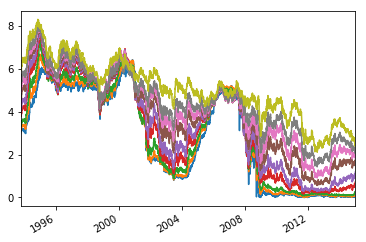

In [2]:
import pandas as pd
import numpy as np
import fmt
cmturl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/cmt.csv"
cmt_rates = pd.read_csv(cmturl, parse_dates=[0], index_col=[0])

tenors = cmt_rates.columns.map(float)
tenorTags = ['T=%g' % m for m in tenors]
cmt_rates.plot(legend=False);



In [3]:
covariance = cmt_rates.cov()
covariance

,0.25,0.5,1,2,3,5,7,10,20
0.25,4.930772,5.022466,4.991281,4.849068,4.558414,3.927906,3.473972,2.950090,2.505140
0.5,5.022466,5.136439,5.119503,4.987844,4.695633,4.054723,3.589470,3.055570,2.597262
1,4.991281,5.119503,5.131915,5.035014,4.760224,4.136530,3.676294,3.145629,2.691677
2,4.849068,4.987844,5.035014,5.001584,4.763235,4.183509,3.744463,3.222834,2.786888
3,4.558414,4.695633,4.760224,4.763235,4.561842,4.040485,3.634975,3.143140,2.737999
5,3.927906,4.054723,4.136530,4.183509,4.040485,3.631485,3.295898,2.874698,2.535390
7,3.473972,3.589470,3.676294,3.744463,3.634975,3.295898,3.011769,2.640593,2.351153
10,2.950090,3.055570,3.145629,3.222834,3.143140,2.874698,2.640593,2.335433,2.096624
20,2.505140,2.597262,2.691677,2.786888,2.737999,2.535390,2.351153,2.096624,1.919146


## Part 1
Its L-2 condition number

In [4]:
_, S, _ = np.linalg.svd(covariance)
S.max()

34.331269621651387

## Part 2
Its singular values, and the ratio between the largest and smallest singular values

In [105]:
_, S, _ = np.linalg.svd(covariance)
print(S)
S.max() / S.min()

[  3.43312696e+01   1.23717917e+00   6.24601527e-02   1.67668300e-02
   7.38918224e-03   2.39507193e-03   1.50154976e-03   9.64149386e-04
   4.59483366e-04]


74717.110966927736

## Part 3
Comment on whether there could be troubled area when computing $\bs y = V^{-1} \bs x$ from this co-variance matrix, if so, give an example of $\bs x$ that the resulting $\bs y$ changes a lot even with a small perturbations in $x$.

In [6]:
S

array([  3.43312696e+01,   1.23717917e+00,   6.24601527e-02,
         1.67668300e-02,   7.38918224e-03,   2.39507193e-03,
         1.50154976e-03,   9.64149386e-04,   4.59483366e-04])

This tells us that our smallest singular value is 0.002913. The left singular vector associated with that singular value is the point of greatest instability we have to deal with. That vector is as follows:

In [7]:
U, _, _ = np.linalg.svd(covariance)
U.T[-1].T

array([ 0.02016683, -0.02445758, -0.10075237,  0.50078979, -0.68310479,
        0.48847927, -0.14989901, -0.09465302,  0.03715662])

# Problem 3

## Part 1
Estimate the covariance of the daily interest rate **changes**

In [8]:
daily_changes = np.log(cmt_rates).diff()[1:]
change_cov = daily_changes.cov()
change_cov

,0.25,0.5,1,2,3,5,7,10,20
0.25,0.024469,0.003964,0.001518,0.000696,0.000576,0.000383,0.000274,0.000201,0.000139
0.5,0.003964,0.004343,0.000835,0.000609,0.000471,0.000331,0.000250,0.000194,0.000140
1,0.001518,0.000835,0.001454,0.000737,0.000611,0.000438,0.000335,0.000252,0.000176
2,0.000696,0.000609,0.000737,0.001383,0.001018,0.000749,0.000568,0.000420,0.000287
3,0.000576,0.000471,0.000611,0.001018,0.001032,0.000746,0.000575,0.000430,0.000298
5,0.000383,0.000331,0.000438,0.000749,0.000746,0.000634,0.000503,0.000386,0.000275
7,0.000274,0.000250,0.000335,0.000568,0.000575,0.000503,0.000428,0.000332,0.000243
10,0.000201,0.000194,0.000252,0.000420,0.000430,0.000386,0.000332,0.000275,0.000204
20,0.000139,0.000140,0.000176,0.000287,0.000298,0.000275,0.000243,0.000204,0.000167


## Part 2
Run the PCA analysis on both the correlation and covariance matrix of the changes, and comment on whether they give equivalent principal components. Note that the correlation matrix can be viewed as the covariance matrix with the normalized risk factors. Make sure you take the normalization into account when comparing the eigenvectors. Try to find a clear way to illustrate their equivalence of the eigenvectors or the lack thereof.

In [9]:
change_corr = daily_changes.corr()
cov_eigvalues, cov_eigvectors = np.linalg.eig(change_cov)
corr_eigvalues, corr_eigvectors = np.linalg.eig(change_corr)
pd.DataFrame([[x*100/cov_eigvalues.sum() for x in cov_eigvalues],
              [x*100/corr_eigvalues.sum() for x in corr_eigvalues]], columns=list(range(1,10)), index=['cov', 'corr'])

,1,2,3,4,5,6,7,8,9
cov,74.328785,13.297028,8.347210,2.559187,1.000660,0.341808,0.082091,0.016331,0.026900
corr,61.692807,16.091980,7.852164,6.613197,4.958886,1.618450,0.703436,0.273980,0.195102


Text(0.5,1,'Covariance')

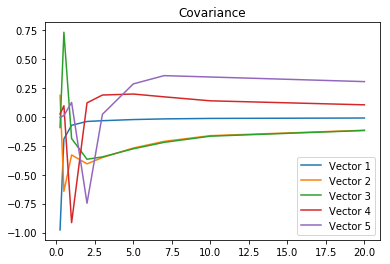

In [10]:
import matplotlib.pyplot as plt
plt.plot(daily_changes.columns.map(float), cov_eigvectors[:,:5])
plt.legend(['Vector %i'%i for i in range(1, 6)])
plt.title('Covariance')

Text(0.5,1,'Correlation')

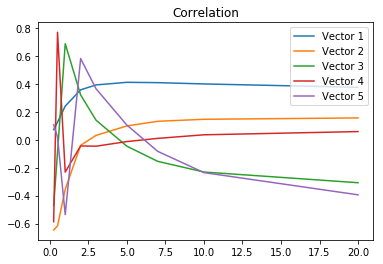

In [11]:
plt.plot(daily_changes.columns.map(float), corr_eigvectors[:,:5])

plt.legend(['Vector %i'%i for i in range(1, 6)])
plt.title('Correlation')

These vectors are clearly obviously not scaled. We expect this: we've essentially changed the units between covariance and correlation (covariance being measured in units of exponential change to the interest rates, and correlation being dimensionless), so the vectors of course changed completely.

## Part 3
From your results, how many principal components are required to explain 95% of the variance of rate changes?

As demonstrated in **Part 2**, in the case of covariance, it requires three components. In the case of correlation, it requires five components.

## Part 4
Plot these principal components of the covariance matrix that account for 95% of the variance and try to give economic explanations of what mode of rates changes they represent.

Text(0.5,1,'Covariance')

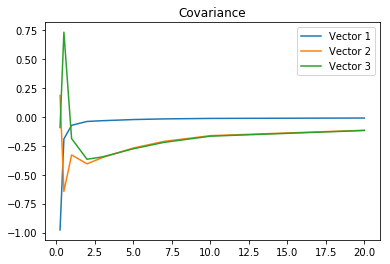

In [14]:
plt.plot(daily_changes.columns.map(float), cov_eigvectors[:,:3])
plt.legend(['Vector %i'%i for i in range(1, 4)])
plt.title('Covariance')

As we can see from the above case, the first eigenvector, which we normally think of as the level, has the general shape of an idealized yield curve. We expect this simply by virtue of how yields operate under normal conditions -- the yield from a longer term security should be greater than that of a shorter term security, as the longer term security is riskier.

The second eigenvector, the slope, also makes sense: we expect slope to decrease fastest in the early going, then slowly taper off: the risk premium of a 20Y security over a 10Y security is significantly different from the risk premium of a 1Y security over a 6M security.

## Part 5
Plot the history of PCA scores, i.e., the factor loading (or the projection) to the first 3 principal components, of the historical data.

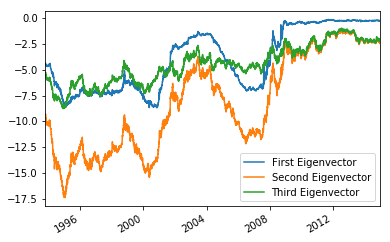

In [27]:
vals = cmt_rates.dot(cov_eigvectors[:,:3])
vals.columns=['First Eigenvector', 'Second Eigenvector', 'Third Eigenvector']
vals.plot()

## Part 6
Write a program to simulate the daily interest rate changes up to the future time of 20Y using the first few principal components of the changes that accounted for 95% of the variance. From your simulated IR change paths, re-estimate the covariance matrix of the changes, then compare it to the original covariance matrix estimated from historical data. (think of a suitable metric for the comparison). You can assume that the daily rates changes are independent normals, and there are 250 business days per year.

In [47]:
def create_simulation(time, eigvectors, eigvalues):
    principal_components = eigvectors
    L_c = principal_components.dot(np.diag(np.sqrt(eigvalues)))
    return pd.DataFrame(L_c.dot(np.random.rand(3, 5000)).T)

sim_res = create_simulation(20*250, cov_eigvectors[:,:3], cov_eigvalues[:3])
sim_res

,0,1,2,3,4,5,6,7,8
0,-0.024333,-0.032416,-0.023083,-0.028591,-0.025084,-0.019251,-0.015120,-0.011523,-0.008151
1,-0.002919,0.018685,-0.014091,-0.022996,-0.021112,-0.016606,-0.013175,-0.009989,-0.007038
2,-0.126282,-0.062794,-0.030809,-0.031588,-0.027269,-0.020562,-0.016000,-0.012177,-0.008611
3,-0.099377,-0.047415,-0.022780,-0.022970,-0.019802,-0.014905,-0.011588,-0.008817,-0.006235
4,-0.032958,-0.014681,-0.026888,-0.036124,-0.032259,-0.024978,-0.019686,-0.014966,-0.010568
5,-0.106042,-0.031407,-0.021752,-0.023268,-0.020422,-0.015512,-0.012103,-0.009184,-0.006482
6,-0.041953,0.008194,-0.024569,-0.035326,-0.032042,-0.024985,-0.019743,-0.014975,-0.010556
7,-0.140558,-0.014316,-0.031329,-0.038077,-0.034170,-0.026320,-0.020666,-0.015652,-0.011029
8,-0.084541,-0.040154,-0.027186,-0.031019,-0.027186,-0.020742,-0.016232,-0.012346,-0.008725
9,-0.108344,-0.024381,-0.025379,-0.029411,-0.026108,-0.019998,-0.015666,-0.011882,-0.008381


In [51]:
sim_cov = sim_res.cov()
sim_cov

,0,1,2,3,4,5,6,7,8
0,0.002004,0.000319,0.000116,0.000043,0.000035,0.000022,0.000015,0.000011,0.000007
1,0.000319,0.000361,0.000073,0.000047,0.000035,0.000024,0.000018,0.000014,0.000010
2,0.000116,0.000073,0.000058,0.000070,0.000062,0.000047,0.000037,0.000028,0.000020
3,0.000043,0.000047,0.000070,0.000095,0.000085,0.000066,0.000052,0.000039,0.000028
4,0.000035,0.000035,0.000062,0.000085,0.000076,0.000059,0.000046,0.000035,0.000025
5,0.000022,0.000024,0.000047,0.000066,0.000059,0.000045,0.000036,0.000027,0.000019
6,0.000015,0.000018,0.000037,0.000052,0.000046,0.000036,0.000028,0.000022,0.000015
7,0.000011,0.000014,0.000028,0.000039,0.000035,0.000027,0.000022,0.000016,0.000012
8,0.000007,0.000010,0.000020,0.000028,0.000025,0.000019,0.000015,0.000012,0.000008


In [50]:
change_cov

,0.25,0.5,1,2,3,5,7,10,20
0.25,0.024469,0.003964,0.001518,0.000696,0.000576,0.000383,0.000274,0.000201,0.000139
0.5,0.003964,0.004343,0.000835,0.000609,0.000471,0.000331,0.000250,0.000194,0.000140
1,0.001518,0.000835,0.001454,0.000737,0.000611,0.000438,0.000335,0.000252,0.000176
2,0.000696,0.000609,0.000737,0.001383,0.001018,0.000749,0.000568,0.000420,0.000287
3,0.000576,0.000471,0.000611,0.001018,0.001032,0.000746,0.000575,0.000430,0.000298
5,0.000383,0.000331,0.000438,0.000749,0.000746,0.000634,0.000503,0.000386,0.000275
7,0.000274,0.000250,0.000335,0.000568,0.000575,0.000503,0.000428,0.000332,0.000243
10,0.000201,0.000194,0.000252,0.000420,0.000430,0.000386,0.000332,0.000275,0.000204
20,0.000139,0.000140,0.000176,0.000287,0.000298,0.000275,0.000243,0.000204,0.000167


Let's use the L2 norms to compare these covariance matrices

In [54]:
l2_sim_cov = np.linalg.svd(sim_cov)[1].max()
l2_change_cov = np.linalg.svd(change_cov)[1].max()
l2_sim_cov, l2_change_cov

(0.0020757401221376337, 0.025409015060263756)

The norms here are dramatically different: the simulation L2 norm is _much_ smaller than the change L2 norm.

## Part 7
Obtain the IR levels from the simulated paths of changes in the previous step, and compute the following statistical metrics of the IR level distributions: mean, standard deviation, 2% and 98% quantiles. Plot the evolution of these statistical metrics over time for the 1Y and 10Y term rates. Make any reasonable assumptions on the starting interest rate term structure.

In [104]:
curr_levels = np.log(cmt_rates[:1]).values
sim_levels = pd.DataFrame(curr_levels, columns=cmt_rates.columns)
for i, step in enumerate(sim_res.values, start=1):
    curr_levels += step
    sim_levels = sim_levels.append(pd.DataFrame(curr_levels, columns=cmt_rates.columns, index=[i]))
sim_levels = np.exp(sim_levels)
means = np.average(sim_levels, axis=0)
stdevs = np.std(sim_levels, axis=0)
percentile = np.percentile(sim_levels, [2, 98], axis=0)
pd.DataFrame(np.array([means]), columns=cmt_rates.columns, index=['Mean']).append(
    pd.DataFrame(np.array([stdevs]), columns=cmt_rates.columns, index=['StDev'])
).append(
    pd.DataFrame(percentile, columns=cmt_rates.columns, index=['2%', '98%'])
)

,0.25,0.5,1,2,3,5,7,10,20
Mean,8.817134e-03,3.426226e-02,3.003809e-02,2.823866e-02,3.457159e-02,5.085032e-02,6.913698e-02,9.690053e-02,1.578654e-01
StDev,1.187107e-01,2.277328e-01,2.221796e-01,2.304405e-01,2.658965e-01,3.418462e-01,4.102371e-01,4.980857e-01,6.749138e-01
2%,2.381002e-158,6.634188e-37,1.229128e-46,1.032493e-56,1.793895e-50,8.651417e-39,1.942384e-30,4.429132e-23,3.178484e-16
98%,1.110192e-03,4.536133e-01,3.492163e-01,2.509613e-01,3.695403e-01,7.318734e-01,1.164874e+00,1.759475e+00,2.796100e+00
